# Data visualizations

This last part of the project consists of two major parts: (A) usual analyses and visualization, and (B) spatial analysis using geopandas. In (A) we analyse various core but also minor (yet interesting) aspects. In (B) we visualize on the map of Prague districts the intensity of rents supplied but also average prices per each district. Our goal was not to dive into one narrow path analysing a single aspect, our goal is to provide a broad range of possible approaches and method when analysing data from sReality. If interested, variety of the analysed variables can be easily replaced by variables of a reader's interest - our code provide solid tools to do that.

In [227]:
import pandas as pd
import numpy as np

In [228]:
data1 = pd.read_csv('clean_data.csv', sep=';',index_col = [0])

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [230]:
import import_ipynb # %pip install import_ipynb

In [231]:
# we want to use one function from previous jupyter so we import it with package import_ipynb
from data_understanding_and_processing import group_exm 

# A) Usual analyses and visualizations

In this section we pick couple of variable and visualise their relationships. We focused on variaty in visualisation technics rather than deep understanding of relationships in our data

## Prices inspection

In [232]:
data1['Cena'].describe() #quick look at the dispertion of prices

count      7646.000000
mean      22432.486529
std       16053.091726
min          12.000000
25%       13500.000000
50%       17500.000000
75%       25000.000000
max      240000.000000
Name: Cena, dtype: float64

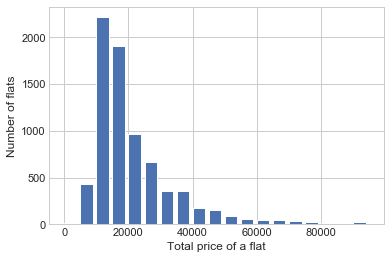

In [233]:
#histogram
np.histogram(data1['Cena'], bins = [0,5000,10000,15000,20000,25000,30000, 100000000])
plt.hist(data1['Cena'], np.arange(0,100000, step = 5000), width = 4000)
plt.xlabel('Total price of a flat')
plt.ylabel('Number of flats')
plt.show()

We can observe that most data points fall into range between 5 000 and 25 000 czk per month with the distribution being skewed to the right. 

In [234]:
#For further analysis, it will be useful to sort the rows into some categories...

#This method groups data into price categories by 10.000 CZK:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
data1['Cena_cat'] = pd.cut(data1['Cena'], bins=interval_range)

#This command groups data into 15 price categories such that each contains the same number of observations (~500):
data1['Cena_cat2'] = pd.qcut(data1['Cena'], q=15) 
data1.head()

,Adresa,Aktualizace,Cena,Price_total,ID_zakázky:,Plocha_podlahová,Podlaží,Podlaží_č,Poznámka_k_ceně,Stav_objektu,...,Vlak_dist,Škola_name,Škola_dist,Školka_name,Školka_dist,Energy_class,Adress_clean,location,Cena_cat,Cena_cat2
0,"Dobrovolného, Praha 9 - Černý Most Panorama",Dnes,12000.0,12 000 Kč za měsíc,N05462,26.0,1. podlaží z celkem 5,1,"+ 2.500,-Kč poplatky, elektřina, provize RK",Novostavba,...,1445.0,"ZUŠ Praha 9, Ratibořická",234.0,MŠ Sluníčko Praha 9 - Černý Most,279.0,G,"Dobrovolného, Praha 9","(50.1017892, 14.5615725)","(10000, 20000]","(11500.0, 12500.0]"
1,"Bořivojova, Praha 3 - Žižkov Panorama",Dnes,9500.0,"9 500 Kč za nemovitost, + provize RK",57/4562,23.0,5. podlaží z celkem 4,5,"plus poplatky, 500",Dobrý,...,984.0,Gymnázium Karla Sladkovského Praha 3,56.0,ZŠ a MŠ Jaroslava Seiferta Praha 3,243.0,G,"Bořivojova, Praha 3","(50.0821429, 14.4537291)","(0, 10000]","(11.999, 10000.0]"
2,"Tupolevova, Praha 9 - Letňany Panorama",Dnes,13900.0,13 900 Kč za měsíc,NaN,NaN,4. podlaží,4,NaN,Velmi dobrý,...,1695.0,Základní škola Fryčovická,160.0,MŠ Havířovská,255.0,NaN,"Tupolevova, Praha 9","(50.1273975, 14.5148998)","(10000, 20000]","(13800.0, 14500.0]"
3,"Podbělohorská, Praha 5 - Smíchov Panorama",Dnes,15000.0,"15 000 Kč za nemovitost, + provize RK",44/4562,58.0,2. podlaží z celkem 3,2,", 3500",Novostavba,...,1229.0,ZUŠ Na Popelce,224.0,"TROIS PETITES POMMES, s.r.o.",343.0,B,"Podbělohorská, Praha 5","(50.0732544, 14.3812666)","(10000, 20000]","(14500.0, 15250.0]"
4,"Mezi domy, Praha 4 - Písnice Panorama",Dnes,19500.0,19 500 Kč za měsíc,5702/2918,93.0,6. podlaží z celkem 6,6,Poplatky dle počtu osob,Po rekonstrukci,...,3635.0,Střední odborné učiliště potravinářské Praha 4,386.0,Mateřská škola Mezi Domy,105.0,D,"Mezi domy, Praha 4","(50.0030025, 14.4615068)","(10000, 20000]","(18000.0, 20000.0]"


In [235]:
data1.pivot_table(index='Cena_cat', margins= True) #Pivot-table insight 
#(might be useful for inspection which variables worth closer attention in regards to their relationship to prices)

,Area,Bankomat_dist,Bus_MHD_dist,Cena,Cukrárna_dist,Divadlo_dist,Hospoda_dist,Hřiště_dist,Kino_dist,Kulturní_památka_dist,...,Pošta_dist,Restaurace_dist,Sportoviště_dist,Tram_dist,Veterinář_dist,Večerka_dist,Vlak_dist,Výtah,Škola_dist,Školka_dist
Cena_cat,,,,,,,,,,,,,,,,,,,,,
"(0, 10000]",28.870307,399.166372,215.298791,8839.356655,444.615929,1155.885510,761.511504,271.148532,1682.014337,1740.837113,...,595.293805,192.803540,537.094991,708.508897,627.555752,332.060177,1200.671280,0.689373,335.334513,308.302655
"(10000, 20000]",53.515123,325.672547,220.125150,15078.733223,382.428323,924.450814,742.767702,257.086104,1489.401951,1681.566604,...,531.654907,178.344845,520.198517,605.326541,634.071304,305.582857,1179.535680,0.790030,270.068323,297.398758
"(20000, 30000]",82.329530,290.192771,250.615228,24964.864430,314.345854,585.563430,708.350815,297.241168,1147.982232,1351.887719,...,504.589653,141.727853,537.815897,345.755297,594.063785,301.976612,1094.396599,0.839854,243.816442,278.330262
"(30000, 40000]",105.426449,277.267296,272.696049,35530.838039,257.509434,420.735849,780.056604,318.828788,964.606299,1143.261002,...,471.361635,123.440252,604.551515,238.671733,601.119497,273.787736,1062.805471,0.899396,202.018868,256.948113
"(40000, 50000]",130.420139,278.073077,256.303249,45758.656250,213.207692,409.888462,753.376923,335.808664,823.243243,992.690909,...,437.707692,121.630769,602.833935,259.068592,657.711538,327.611538,1081.054348,0.886139,169.642308,267.234615
"(50000, 60000]",143.924242,187.180328,244.674419,55019.424242,146.614754,299.418033,697.557377,358.899225,699.098361,1141.511628,...,277.540984,89.377049,664.945736,191.658915,524.303279,266.163934,981.759690,0.925532,156.393443,232.704918
"(60000, 70000]",170.453488,311.564103,359.600000,65770.918605,243.038462,501.205128,705.871795,267.670588,985.974359,1081.458824,...,548.564103,120.076923,548.188235,246.376471,515.358974,347.384615,1172.600000,0.935484,187.666667,261.666667
"(70000, 80000]",176.357143,292.176471,328.277778,75154.482143,193.392157,369.705882,633.882353,271.055556,881.470588,1043.185185,...,346.058824,123.686275,604.425926,194.166667,695.058824,334.666667,1093.462963,0.944444,145.098039,314.215686
"(80000, 90000]",196.742857,193.029412,304.257143,87095.914286,188.382353,448.647059,453.529412,334.828571,741.235294,847.771429,...,419.411765,141.382353,524.742857,171.971429,505.617647,404.705882,1098.571429,0.958333,160.470588,275.617647


## Condition of the flat

In [236]:
data1.pivot_table(index='Stav_objektu', margins= True) 
#Naturally, we can expect - the better condition, the higher price. Let's confirm this hypothesis...

,Area,Bankomat_dist,Bus_MHD_dist,Cena,Cukrárna_dist,Divadlo_dist,Hospoda_dist,Hřiště_dist,Kino_dist,Kulturní_památka_dist,...,Pošta_dist,Restaurace_dist,Sportoviště_dist,Tram_dist,Veterinář_dist,Večerka_dist,Vlak_dist,Výtah,Škola_dist,Školka_dist
Stav_objektu,,,,,,,,,,,,,,,,,,,,,
Dobrý,61.823810,317.267462,221.384117,18595.077815,347.074957,808.424915,710.989779,243.662885,1477.796902,1551.352113,...,528.451448,169.458262,528.411669,488.379705,576.894378,292.548552,1172.392220,0.662309,237.017036,266.761499
K demolici,83.000000,368.000000,243.000000,17000.000000,308.000000,1621.000000,2394.000000,45.000000,660.000000,2726.000000,...,590.000000,313.000000,220.000000,2313.000000,255.000000,136.000000,1131.000000,1.000000,282.000000,229.000000
Novostavba,66.218627,425.426216,234.901363,19837.180703,519.280297,1299.558626,927.388293,264.023237,1778.597176,1967.016569,...,640.251443,250.585326,521.393429,861.370675,779.061006,364.741138,1264.833601,0.951245,382.584501,368.178071
Po rekonstrukci,70.925551,281.458491,239.408816,23289.943210,283.322013,626.923222,681.575472,279.096618,1140.696338,1386.888036,...,479.045283,127.963522,540.746981,372.154033,565.318868,281.344654,1103.714804,0.827966,219.558491,265.804403
Projekt,53.500000,273.500000,261.000000,12925.000000,119.500000,1705.000000,1162.500000,177.000000,2913.500000,NaN,...,982.500000,177.000000,415.000000,1620.500000,895.000000,221.000000,1632.500000,1.000000,443.000000,473.500000
Před rekonstrukcí,92.727273,227.800000,141.545455,32772.727273,412.200000,1295.200000,531.600000,229.272727,1376.900000,1550.250000,...,540.900000,109.700000,423.636364,687.272727,552.300000,140.200000,1568.545455,0.750000,192.500000,134.300000
Ve výstavbě,55.000000,440.000000,52.000000,13990.000000,228.000000,1438.000000,1288.000000,272.000000,1138.000000,1563.000000,...,905.000000,243.000000,540.000000,56.000000,1830.000000,272.000000,468.000000,1.000000,254.000000,402.000000
Velmi dobrý,73.154187,297.016786,237.532338,23393.748805,322.266601,693.673687,705.373241,283.696568,1257.071429,1427.772129,...,489.484819,149.143175,548.099882,440.931644,598.342138,303.003950,1127.170657,0.788653,232.619600,276.646013
All,74.084848,296.815758,231.686667,22638.427879,328.117576,653.916364,740.147273,282.872121,1299.086667,1499.040606,...,475.580606,150.829697,512.164848,399.895758,591.350303,300.243030,1117.311515,0.792727,236.141818,275.701212


In [237]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 9)
labels = 'Dobrý', 'K demolici', 'Novostavba','Po rekonstrukci', 'Projekt', 'Před rekonstrukcí', 'Ve výstavbě','Velmi dobrý'
'''
plt.pie(condition, 
        labels=labels, 
        autopct='%1.1f%%',
        colors=colors,
        shadow=True, 
        startangle=90)
plt.show()'''

"\nplt.pie(condition, \n        labels=labels, \n        autopct='%1.1f%%',\n        colors=colors,\n        shadow=True, \n        startangle=90)\nplt.show()"

In [238]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

We use box plot to better understand the strenght of the relationship between price and condition. 

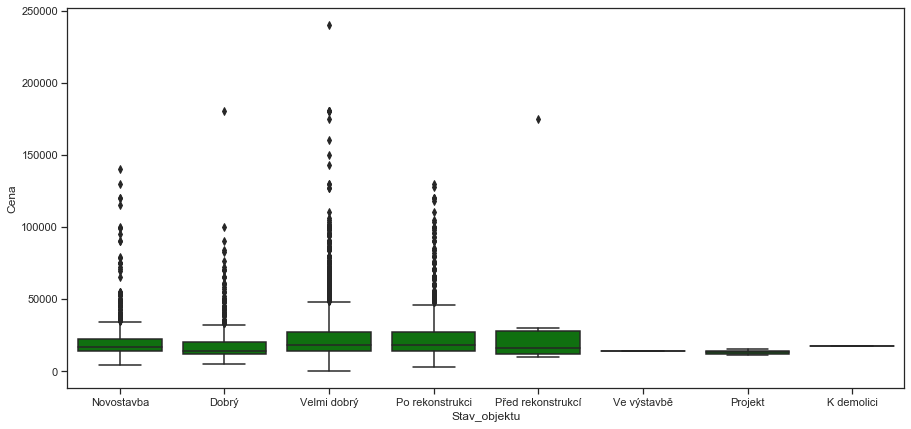

In [239]:
plt.figure(figsize=(15,7))
sns.boxplot(
    data=data1,
    x='Stav_objektu',
    y='Cena',
    color='green')

It is quite surprising that the prices "před rekonstrukcí" a "po rekonstrukci" do not differ much. On the other hand, the difference between "dobrý" and "velmi dobrý" follows the intuition.

## Number of floors

In [240]:
#By the analysis below, we confirm the expected - the floor seems not to be 
#considerably important driver of a price (with the exception of flats in cellar).

x = np.array(data1.Cena)
y = np.array(data1.Podlaží_č)
a = data1.groupby('Podlaží_č')['Cena'].mean()
print(a)

Podlaží_č
-1    10614.285714
 0    20222.758621
 1    19370.094972
 2    21843.314251
 3    21930.259935
 4    22963.783189
 5    24964.460474
 6    25779.676876
 7    25228.108696
 8    17061.325843
 9    16910.189189
Name: Cena, dtype: float64


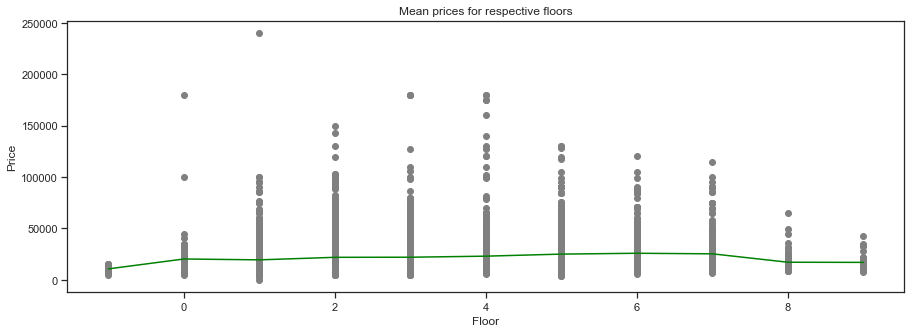

In [241]:
f = [-1,0,1,2,3,4,5,6,7,8,9]
a

plt.figure(figsize=(15,5))
plt.plot(f, a, "green")
plt.title('Mean prices for respective floors')
plt.scatter(y, x, color="grey")
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

The flatness of the curve proves the hyphotesis that the price is not explained by floor.

## "Cukrárna" or "Hospoda" in neighborhood?

In [242]:
data1.groupby('Cena_cat2')['Cukrárna_dist'].mean()

Cena_cat2
(11.999, 10000.0]      444.615929
(10000.0, 11500.0]     420.437500
(11500.0, 12500.0]     419.190377
(12500.0, 13800.0]     389.510593
(13800.0, 14500.0]     391.311111
(14500.0, 15250.0]     370.386364
(15250.0, 16900.0]     385.692464
(16900.0, 18000.0]     343.847902
(18000.0, 20000.0]     356.740433
(20000.0, 22000.0]     332.250720
(22000.0, 25000.0]     314.852552
(25000.0, 29000.0]     290.197436
(29000.0, 35000.0]     310.143725
(35000.0, 45000.0]     200.570755
(45000.0, 240000.0]    212.103158
Name: Cukrárna_dist, dtype: float64

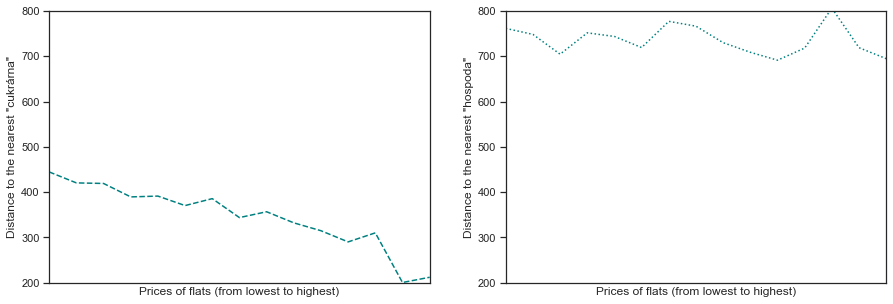

In [243]:
#Let's have a look whether the price category of a flat is somehow related to 
#closness of "coffe sweet shop bar" or a pub...

c = data1.groupby('Cena_cat2')['Cukrárna_dist'].mean()
d = data1.groupby('Cena_cat2')['Hospoda_dist'].mean()


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
c.plot(color='teal',linestyle='dashed')
plt.xlabel('Prices of flats (from lowest to highest)')
plt.ylabel('Distance to the nearest "cukrárna"')
plt.xticks([])
plt.ylim(200,800)



plt.subplot(1, 2, 2)
d.plot(color='teal',linestyle='dotted')
plt.xlabel('Prices of flats (from lowest to highest)')
plt.ylabel('Distance to the nearest "hospoda"')
plt.ylim(200,800)
plt.xticks([])
plt.show()

<p>We can observe that distance to nearest cake shop is decreasing with the price you pay for renting the flat. It is interesting to note that the average distance to the nearest pub is constant. The distance of a pub does not depend on price category.</p><br>In this case, flats are divided into 15 cathegories so that it is true that each cathegory has similar size.

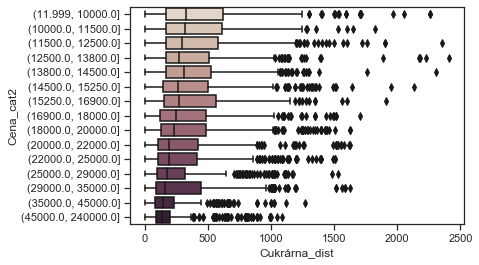

In [244]:
#Based on this very limited analysis (one could even call it "analysis that is absurdly blind 
#towards other much more important obvious factors of price), it seems that "cukrárna" just matters!
sns.boxplot( 
    x="Cukrárna_dist",
    y="Cena_cat2",
    palette="ch:.25", 
    data=data1)

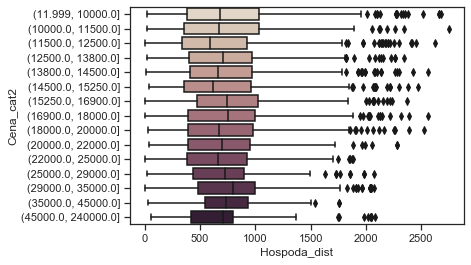

In [245]:
sns.boxplot( 
    x="Hospoda_dist",
    y="Cena_cat2",
    palette="ch:.25", 
    data=data1)

## Area of a flat
Area is one of the very first aspects that comes to one's mind when talking about a flat's price. Does our data suggest this?

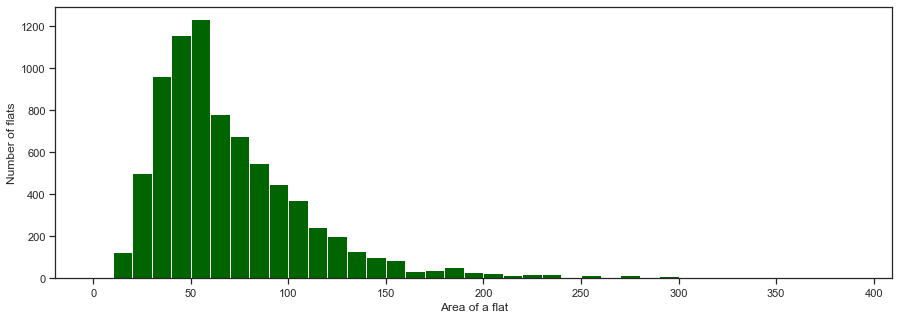

In [246]:
plt.figure(figsize=(15,5))
plt.hist(data1['Area'], np.arange(0,400, step = 10), width = 10, color = 'darkgreen')
plt.xlabel('Area of a flat')
plt.ylabel('Number of flats')
plt.show()

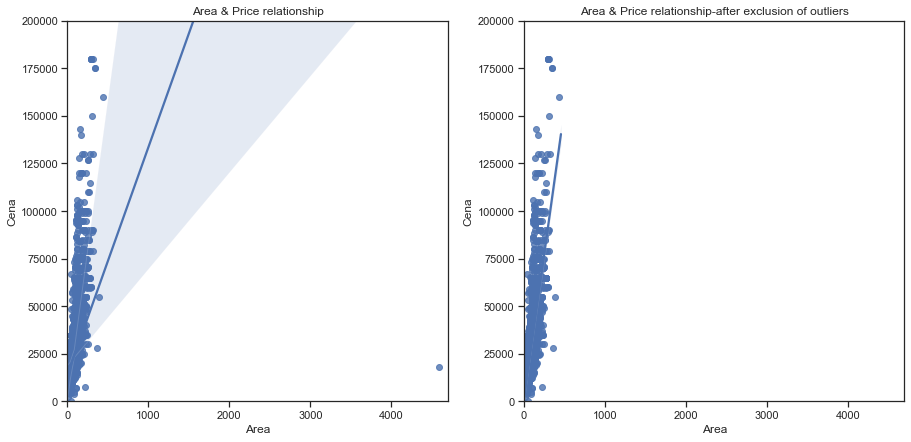

In [263]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,2)
plt.title('Area & Price relationship-after exclusion of outliers')
plt.xlabel('Area')
plt.ylabel('Cena')
sns.regplot(data1['Area'].where(data1.Area < 3000),data1['Cena'])
plt.xlim((0, 4700))
plt.ylim((0,200000))

plt.subplot(1,2,1)
plt.title('Area & Price relationship')
plt.xlabel('Area')
plt.ylabel('Cena')
sns.regplot(data1['Area'],data1['Cena'])
plt.xlim((0, 4700))
plt.ylim((0,200000))
plt.show()

After exclusion of outliers we can see that the regression line fits better. This graph says that a small increase in area has more than proportional influence on price. 

## Energy demans

In [44]:
group_exm('Energy_class') #It is really surprising how large portion of flats belong to the worst - G - category.

Energy_class
A      54
B     616
C     867
D     395
E     120
F      47
G    3883
Name: Energy_class, dtype: int64

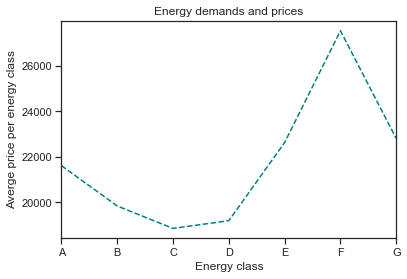

In [45]:
#By this simple plot, one might hastily argue that the worse energy demands - the higher price,
#which sounds somehow countra-intuitive (because bad energy demands are connected 
#rather with old buildings that should be cheaper...). But let's give it further look.

e = data1.groupby('Energy_class')['Cena'].mean()

e.plot(color='teal',linestyle='dashed')
plt.title('Energy demands and prices')
plt.xlabel('Energy class')
plt.ylabel('Averge price per energy class')
plt.show()

By this simple plot, one might hastily argue that the worse energy demands - the higher price,
which sounds somehow countra-intuitive (because bad energy demands are connected 
rather with old buildings that should be cheaper...). But let's give it further look.
This could be cause by the fact that in renting the energy is covered by the renter more often than by the rentee.

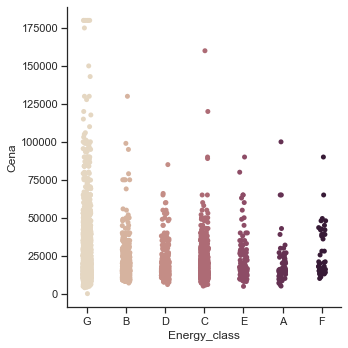

In [46]:
sns.catplot(
    x="Energy_class", 
    y="Cena", 
    palette="ch:.25", 
    data=data1)

Same graph is below, more precise but less aesthetic.

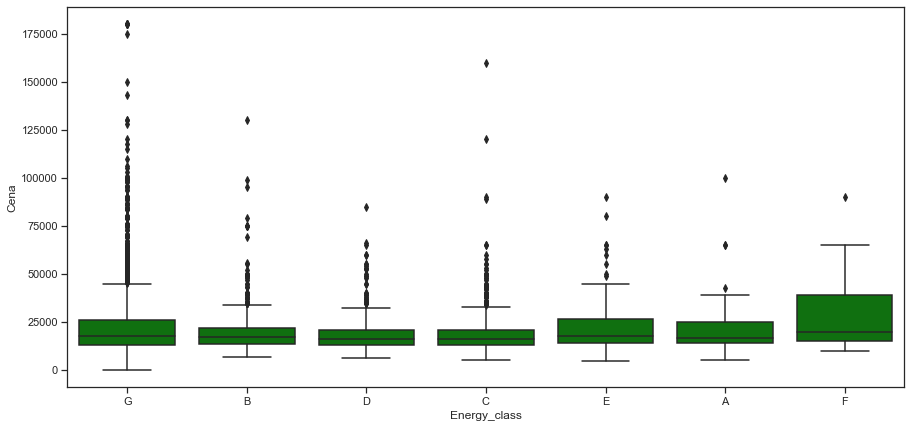

In [47]:
plt.figure(figsize=(15,7))
sns.boxplot(
    data=data1,
    x='Energy_class',
    y='Cena',
    color='green')

After closer look, it seems that the high average price of group G can be partially explained by quite high number of outliers. Still, some surprices remain - especially the relatively low prices of group A.

## Metro

In [48]:
data1.head()

,Unnamed: 0,Adresa,Aktualizace,Cena,Price_total,ID_zakázky:,Plocha_podlahová,Podlaží,Podlaží_č,Poznámka_k_ceně,...,Vlak_dist,Škola_name,Škola_dist,Školka_name,Školka_dist,Energy_class,Adress_clean,location,Cena_cat,Cena_cat2
0,0,"Dobrovolného, Praha 9 - Černý Most Panorama",Dnes,12000.0,12 000 Kč za měsíc,N05462,26.0,1. podlaží z celkem 5,1,"+ 2.500,-Kč poplatky, elektřina, provize RK",...,1445.0,"ZUŠ Praha 9, Ratibořická",234.0,MŠ Sluníčko Praha 9 - Černý Most,279.0,G,"Dobrovolného, Praha 9","(50.1017892, 14.5615725)","(10000, 20000]","(11500.0, 12500.0]"
1,1,"Bořivojova, Praha 3 - Žižkov Panorama",Dnes,9500.0,"9 500 Kč za nemovitost, + provize RK",57/4562,23.0,5. podlaží z celkem 4,5,"plus poplatky, 500",...,984.0,Gymnázium Karla Sladkovského Praha 3,56.0,ZŠ a MŠ Jaroslava Seiferta Praha 3,243.0,G,"Bořivojova, Praha 3","(50.0821429, 14.4537291)","(0, 10000]","(11.999, 10000.0]"
2,2,"Tupolevova, Praha 9 - Letňany Panorama",Dnes,13900.0,13 900 Kč za měsíc,NaN,NaN,4. podlaží,4,NaN,...,1695.0,Základní škola Fryčovická,160.0,MŠ Havířovská,255.0,NaN,"Tupolevova, Praha 9","(50.1273975, 14.5148998)","(10000, 20000]","(13800.0, 14500.0]"
3,3,"Podbělohorská, Praha 5 - Smíchov Panorama",Dnes,15000.0,"15 000 Kč za nemovitost, + provize RK",44/4562,58.0,2. podlaží z celkem 3,2,", 3500",...,1229.0,ZUŠ Na Popelce,224.0,"TROIS PETITES POMMES, s.r.o.",343.0,B,"Podbělohorská, Praha 5","(50.0732544, 14.3812666)","(10000, 20000]","(14500.0, 15250.0]"
4,4,"Mezi domy, Praha 4 - Písnice Panorama",Dnes,19500.0,19 500 Kč za měsíc,5702/2918,93.0,6. podlaží z celkem 6,6,Poplatky dle počtu osob,...,3635.0,Střední odborné učiliště potravinářské Praha 4,386.0,Mateřská škola Mezi Domy,105.0,D,"Mezi domy, Praha 4","(50.0030025, 14.4615068)","(10000, 20000]","(18000.0, 20000.0]"


# B) GEOPANDAS SPATIAL ANALYSIS

First, we upload the Prague districts (from the open data source www.geoportalpraha.cz/cs/data/otevrena-data/). Second, having the data prepared with location column (latitude, longitude), we can put all of this together to enjoy juicy visualizations of number of supplid flats per district or average prices per district. At the end, there is also a bonus showing the paths how to work with realistic map of Prague using folium package. 

In [49]:
import geopandas as gpd #geopandas is bell installed in anaconda prompt with "conda install geopandas"

It may happen that some dependancies of geopandas wont be installed. In that case, use may want to use anaconda prompt again with for example 'conda install descartes'

## Preparing the settup
### Upload Prague districts from open sources 

In [50]:
mestske_casti = gpd.read_file('TMMESTSKECASTI_P.json') 
# loading the open data of Prague's districts in JSON form 
# (JSON is the best option as it is easily readable and does not rely on other files)

In [51]:
print(mestske_casti.head(2)) #Let's explore the file's content

#Especially column "geometry" is crucial for the analysis as it defines precisely all the coordinates of districts' polygons

   OBJECTID       DAT_VZNIK       DAT_ZMENA       PLOCHA  ID  KOD_MC  \
0         1  20181106141412  20191105233720  10183715.83  25  547310   
1         2  20171110095818  20190423111436  13529637.40   9  547361   

         NAZEV_MC  KOD_MO KOD_SO  TID_TMMESTSKECASTI_P   POSKYT  ID_POSKYT  \
0  Praha-Čakovice      94    221                    25  HMP-IPR         43   
1        Praha 14      94    141                     9  HMP-IPR         43   

  STAV_ZMENA   NAZEV_1  Shape_Length    Shape_Area  \
0          U  Čakovice  18510.070841  1.018372e+07   
1          U  Praha 14  21694.540664  1.352964e+07   

                                            geometry  
0  POLYGON ((-733714.400 -1035864.400, -733688.20...  
1  POLYGON ((-733418.050 -1044942.710, -733418.90...  


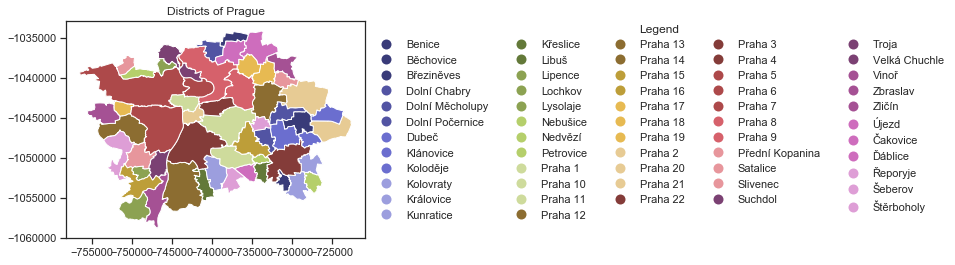

In [52]:
leg_kwds= {'title':'Legend',
          'loc':'upper left',
           'bbox_to_anchor':(1.0,1.03),
          'ncol':5}

mestske_casti.plot(column='NAZEV_1', cmap= 'tab20b', 
                   legend = True, legend_kwds=leg_kwds)
plt.title('Districts of Prague')
plt.show()

### Last data adjustments... for comfortable geospatial analysis

In [53]:
#Let's prepare data that are needed for our analysis...
useful = ['Cena', 'Cena_cat', 'location']
data_s = data1[useful].copy()
data_s = data_s.dropna()
data_s.head()

,Cena,Cena_cat,location
0,12000.0,"(10000, 20000]","(50.1017892, 14.5615725)"
1,9500.0,"(0, 10000]","(50.0821429, 14.4537291)"
2,13900.0,"(10000, 20000]","(50.1273975, 14.5148998)"
3,15000.0,"(10000, 20000]","(50.0732544, 14.3812666)"
4,19500.0,"(10000, 20000]","(50.0030025, 14.4615068)"


In [54]:
#Check for NaNs - it seems OK (at least in the first two columns, the last one is tricky)
data_s.isnull().values.any().sum().sum()

0

In [55]:
#As NaNs are generated as strings in the column 'location', the method .dropna() doesn't work here...
location_x = data_s['location'].replace("NaN","0") 
data_s['location_x'] = location_x
data_s = data_s[data_s.location_x != "0"]

In [56]:
#Now, we need to extract the coordinates out of 'location' into lat & lng columns
data_s['lat'] = [loc[0] for loc in data_s.location_x]
data_s['lng'] = [loc[1] for loc in data_s.location_x]

In [57]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7555 entries, 0 to 7877
Data columns (total 6 columns):
Cena          7555 non-null float64
Cena_cat      7555 non-null category
location      7555 non-null object
location_x    7555 non-null object
lat           7555 non-null object
lng           7555 non-null object
dtypes: category(1), float64(1), object(4)
memory usage: 362.5+ KB


Seems that everything is fine, we just left out some values (either due to authors who did not state the price at all in their ad, or due to some possible imperfections of our automatic process of GPS coordinates generation). Yet, the loss seems not to be catastrophic - from 7878 observation, we get to 7645 observation with full info about prices and 7555 observations with valid values in location information, i.e. 96 % of data remains. Furthermore, we have no reason to suspect this loss to follow some underlaying pattern that would affect our analysis, i.e. we can assume randomness of this observations removals. 

## Analysing density of supplied flats per district

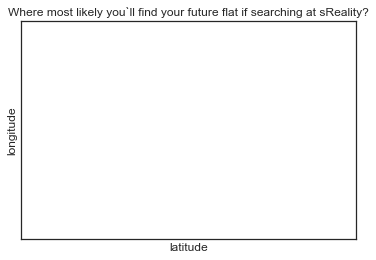

In [58]:
#Let's have a look how flats' offers are dispersed within Prague?
plt.scatter(x = data_s.lat, y= data_s.lng, c = 'darkgreen', marker = 'p')
plt.xlim((49.8, 50.4))
plt.ylim((14.0,15.0))
plt.grid()
plt.title('Where most likely you`ll find your future flat if searching at sReality?')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

Obviously, such "map" does not tell us much... We need to link it to the real interactive map of Prague or at least (non-interactive) map of districts. So let's put together this scatter plot and info that it contains with the maps defined/imported above.

In [59]:
#For doing so we need to create a GeoDataFrame from a DataFrame
from shapely.geometry import Point

data_s['geometry'] = data_s.apply(lambda x: Point((x.lng,x.lat)),axis = 1)
flats_crs = {'init': 'epsg:4326'}

TypeError: ('must be real number, not str', 'occurred at index 0')

In [ ]:
flats_geo = gpd.GeoDataFrame(data_s, crs = flats_crs, geometry = data_s.geometry)

In [ ]:
mc_geo = gpd.GeoDataFrame(mestske_casti, crs = flats_crs, geometry = mestske_casti.geometry)

In [ ]:
#convert geometry from decimal degrees to meters
flats_geo.geometry = flats_geo.geometry.to_crs(epsg = 3857)
flats_geo.head(1)

In [ ]:
mc_geo.geometry = mc_geo.geometry.to_crs(epsg = 3857)
mc_geo.head(1)

In [ ]:
#This is a crucial part that analyse the geospacial intersection of our flats and concrete districts.
flats_within_districts = gpd.sjoin(mc_geo, flats_geo, op = 'intersects')
flats_within_districts.head(10)

In [ ]:
#After exloring the intersections one by one case (through the .sjoin method), we can now group them.

flats_in_districts = flats_within_districts[['NAZEV_MC','index_right']
            ].groupby('NAZEV_MC').count().sort_values('index_right', ascending = False)

flats_in_districts.head(5)

In [ ]:
flats_in_districts_df = pd.DataFrame(flats_in_districts) #convert to DataFrame...

In [ ]:
#...and prepare nice new DataFrame
flats_in_districts_df.reset_index(inplace=True) 
flats_in_districts_df.columns = ['NAZEV_MC','Flats_count']
flats_in_districts_df.head()

In [ ]:
#Our task now is to merge these Flats_counts into map and visualize it...
#Before merging, we need be sure we're considering only the common districts (to have the same lenght of DataFrames)
mestske_casti_df = pd.DataFrame(mestske_casti)
mylist = list(flats_in_districts_df.NAZEV_MC)
mestske_casti_df_x = mestske_casti_df[mestske_casti_df.NAZEV_MC.isin(mylist)]

In [ ]:
districts_with_counts = pd.merge(mestske_casti_df_x,flats_in_districts_df, on = 'NAZEV_MC') #merging

In [ ]:
#Converting the newly created DataFrame into GeoDataFrame
districts_with_counts = gpd.GeoDataFrame(districts_with_counts, crs = flats_crs, geometry = districts_with_counts.geometry)

In [ ]:
#with GeoDataFrames we can do couple of cool things,
#e.g. use this .area method to calculate the total area of respective district (good to have for any density measures)

districts_with_counts['area'] = districts_with_counts.geometry.area 

In [ ]:
#Now we simply obtain the density of flats offered per certain districts...
districts_with_counts['flats_density'] = districts_with_counts.apply(lambda row: row.Flats_count/row.area, axis = 1)

districts_with_counts.head(2)

In [ ]:
#...and visualize it in the map by so called "Choropleth" geopanda plot:
districts_with_counts.plot(column = 'Flats_count', edgecolor = 'black', cmap = 'PuRd',figsize=(10,5), legend = True)
plt.title('Density of flats offered')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

## Analysing average prices of supplied flats per district

## Energy demands

## (B) BONUS part

### Interactive map of Prague
Defining interactive map of Prague, centered with the National Theatre, using folium package.

In [ ]:
import folium

Prague = folium.Map(location=[50.0811583,14.4134967], zoom_start = 12) #the location corresponds to the National Theatre
display(Prague)

In [ ]:
#Na hraní... člověk si tam takhle pěkně může vyznačit, co chce 8) 
#(akorát se mi to pak navzájem přepisuje a nemizí původní příkazy)

Prague = folium.Map(location=[50.0811583,14.4134967], zoom_start = 12)
Prague_3 = mc_geo.loc[mc_geo.NAZEV_MC =='Praha 3']
folium.GeoJson(Prague_3).add_to(Prague)
display(Prague)

In [ ]:
#NOT SURE WHY THIS DOES NOT WORK :(( 

Prague.choropleth(
    geo_data = districts_with_counts,
    name = 'geometry',
    data = districts_with_counts,
    columns = ['NAZEV_MC', 'Flats_count'],
    key_on = 'feature.id',
    fill_color = 'YlGn',
    fill_opacity = 0.75,
    line_opacity = 0.5,
    legend_name = 'Density of flats offered')

folium.LayerControl().add_to(Prague)
display(Prague)

## IN PROGRESS...

In [ ]:
mc_geo_x = mc_geo.geometry.to_crs(epsg = 4326)
flats_geo_x = flats_geo.geometry.to_crs(epsg = 4326)

In [ ]:
mc_geo.plot(column='NAZEV_MC')
plt.scatter(x = data_s.lat, y = data_s.lng, c='black')
plt.xlim((49.8, 50.4))
plt.ylim((14.0,15.0))
plt.show()

In [ ]:
#Nástřel kódu, kdybychom chtěli vybrat jen určité byty a ty zobrazit (s cenovou kategorií mi to teda nefunguje,
#ale třeba by to šlo s něčím "jednodušším".
chosen_flats = flats_geo.loc(flats_geo.Cena_cat == (10000, 20000])
ax = mc_geo.plot(color = 'lightgreen')
chosen_flats.plot(ax=ax, column = 'NAZEV_MC', legend = True)
plt.show()
                             
Prague_x = folium.Map(location=[50.0811583,14.4134967], zoom_start = 12)
flats = flats_geo.loc[flats_geo.Cena_cat =='(10000, 20000]']
Prague_flats = folium.GeoJson(flats).add_to(Prague_x)
display(Prague_flats)